## ไฟล์นี้เป็นตัวอย่างการเรียกใช้งาน CNN โดยใช้ข้อมูลของ Fashion MNIST

In [13]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.17.0-dev20240601
3.4.1.dev2024071703


### จัดการข้อมูล
<br> ต้องมีการปรับ หรือ reshape ข้อมูลนิดหน่อยเพื่อให้สอดคล้องกับตัว CNN ที่เป็น 2 มิติ 
<br> โดยแต่ละมิติเป็นดังนี้ (จำนวนภาพ, ค.กว้าง, ค.ยาว, มิติสี) ในที่นี้ภาพเป็นขาวดำจึงมีทั้งหมด 1 มิติสีเท่านั้น

In [16]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

In [18]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

### สร้างโมเดล
input_shae = (28, 28, 1) เพื่อบอกว่าภาพมีขนาด 28 x 28 และ 1 มิติสีเท่านั้น ถ้าภาพเป็น RGB จะเป็น (28, 28, 3)

<br> padding = 'same' คืออะไร?
<br>เนื่องจากว่า Filter นั้นมีขนาด 3x3 ซึ่งก็จะหลีกเลี่ยงไม่ได้เลยว่าตรงขอบจะไม่ได้ถูกพิจารณา
<br>การสั่ง padding เป็นการเติมขอบของรูปภาพออกไปเพื่อให้ filter นั้นพิจารณาตรงขอบด้วย
<br>'same' หมายความว่าให้เติมส่วนขอบด้วยเลข 0 (zero padding)

In [21]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same', 
                        input_shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │       250,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,210 (981.29 KB)

 Trainable params: 251,210 (981.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(train_images, train_labels, batch_size=256, 
                    validation_data=(test_images, test_labels), epochs=50)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7543 - loss: 0.7284 - val_accuracy: 0.8609 - val_loss: 0.3959
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.8772 - loss: 0.3514 - val_accuracy: 0.8733 - val_loss: 0.3551
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.8948 - loss: 0.2950 - val_accuracy: 0.8871 - val_loss: 0.3192
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9054 - loss: 0.2655 - val_accuracy: 0.8898 - val_loss: 0.3105
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9118 - loss: 0.2485 - val_accuracy: 0.8952 - val_loss: 0.2958
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9185 - loss: 0.2285 - val_accuracy: 0.8944 - val_loss: 0.2978
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9203 - loss: 0.2253 - val_accuracy: 0.8992 - val_loss: 0.2911
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9226 - loss: 0.2148 - 

### วิเคราะห์
จะสังเกตุได้ว่าพอเราหันมาใช้ CNN ที่มองภาพเป็นส่วนๆแล้ว acc นั้นดีขึ้นอย่างเห็นได้ชัด ที่สำคัญไปกว่านั้น loss ก็ต่ำมากๆเช่นกัน <br>
แสดงว่าวิธีของ CNN เหมือนจะดีกว่า แต่จะสังเกตุได้ว่ามันยังดูจะไม่เก่งเมื่อเจอข้อมูลที่ไม่เคยเห็น

In [35]:
print(history.history.keys())
print(history.history['loss'])
key = 'val_loss'
for i,value in enumerate(history.history[key]):
    print(f"epoch {i}: {value}")

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0.510796308517456, 0.33451104164123535, 0.29190048575401306, 0.2646317481994629, 0.2471228539943695, 0.23386745154857635, 0.22151757776737213, 0.21338066458702087, 0.2035948932170868, 0.1944892257452011, 0.18686775863170624, 0.17905965447425842, 0.17399699985980988, 0.16723951697349548, 0.16247837245464325, 0.1569444239139557, 0.1532769650220871, 0.14739595353603363, 0.14365893602371216, 0.1389111876487732, 0.13364434242248535, 0.13041037321090698, 0.1264907270669937, 0.1208038181066513, 0.11966415494680405, 0.11520447582006454, 0.11095073819160461, 0.10910164564847946, 0.10452838242053986, 0.10316447913646698, 0.09748779982328415, 0.09484009444713593, 0.09382762759923935, 0.08857177197933197, 0.08704446256160736, 0.08306250721216202, 0.0807332694530487, 0.07819027453660965, 0.07655716687440872, 0.0742587000131607, 0.07157471030950546, 0.06942041963338852, 0.06777364760637283, 0.06458435207605362, 0.06260286271572113, 0.06075

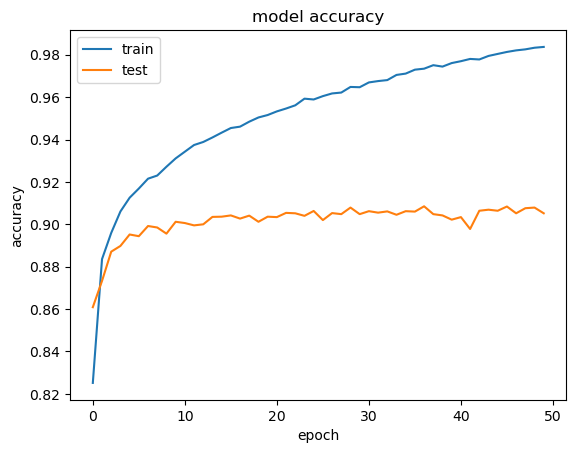

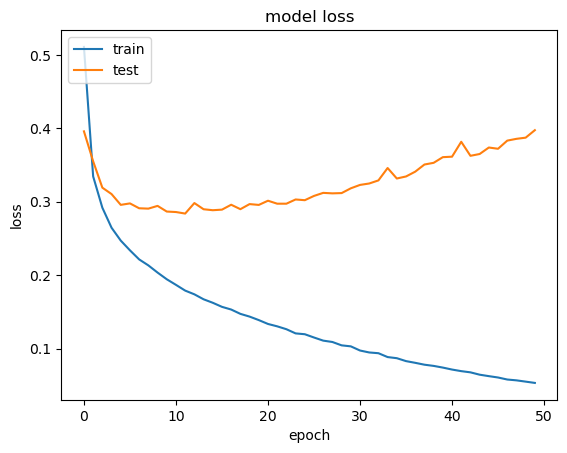

In [37]:
# plot accuracy history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### วิเคราะห์ผลลัพธ์

### Accuracy <br> 
จะเห็นได้ว่าความแม่นยำในระหว่างฝึกนั้นเพิ่มสูงขึ้นเรื่อยๆ จนได้ความแม่นยำที่ 98+% <br>
แต่เมื่อดูที่ผลของ test จะเห็นว่าความเม่นยำอยู่ที่ ***90%*** <br>

### Loss
ค่าความห่างจากเฉลยหรือ loss นั้นลดลงเมื่อจำนวนรอบเพิ่มขึ้น <br>
แต่ดูเหมือนว่า ผล loss ที่ผ่านข้อมูล validation เข้ามานั้นมีแนวโน้มที่เพิ่มขึ้นอย่างเห็นได้ชัด ***ซึ่งถือว่าไม่ดี***

## แล้วถ้าเพิ่ม Layer จะเกิดอะไรขึ้น ไปดูไฟล์ Convolution + Dense 64.ipynb